## Classification

#### Importing required libraries:

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

#### Loding data:

In [3]:
data = pd.read_csv('../Dataset/Processed_dataset.csv')
print(data)


      Anxiety_levelA anxiety_level  self_esteem  mental_health_history  \
0               0.14          High         0.20                      0   
1               0.15          High         0.08                      1   
2               0.12        Medium         0.18                      1   
3               0.16          High         0.12                      1   
4               0.16          High         0.28                      0   
...              ...           ...          ...                    ...   
1095            0.11        Medium         0.17                      0   
1096            0.09        Medium         0.12                      0   
1097            0.04           Low         0.26                      0   
1098            0.21          High         0.00                      1   
1099            0.18          High         0.06                      1   

      depression  headache  blood_pressure  sleep_quality  breathing_problem  \
0           0.11         2     

### Information Gain (entropy)

1. ### Small (60% train, 40% test)

In [ ]:
# Encoding the 'anxiety_level' column
le = LabelEncoder()
data['anxiety_level'] = le.fit_transform(data['anxiety_level'])

# Feature Selection
fn1 = data.keys().tolist()[:-1]
X1 = data[fn1]
y1 = data['stress_level']

# Encode target variable to numerical values
le1 = LabelEncoder()
y_encoded1 = le1.fit_transform(y1)

# Splitting Data into 60% training and 40% testing subsets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_encoded1, test_size=0.4, random_state=1)

# Building decision tree model
clf1 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train Decision Tree Classifier
clf1 = clf1.fit(X_train1, y_train1)

# Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = precision_score(y_test1, y_pred1, average='weighted')  
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = recall_score(y_test1, y_pred1, average='weighted')  
print("Sensitivity:", sensitivity)

# Calculate Specificity (for binary classification only)
cm = confusion_matrix(y_test1, y_pred1)

if cm.shape == (2, 2):  # Ensure binary classification
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print("Specificity:", specificity)
else:
    print("Specificity calculation is not defined for multiclass problems.")


Accuracy: 0.884090909090909
Error Rate: 0.11590909090909096
Precision: 0.8867001943058211
Sensitivity: 0.884090909090909
Specificity calculation is not defined for multiclass problems.


- #### Confusion matrix

[[139  10   6]
 [ 11 129   2]
 [  9  13 121]]


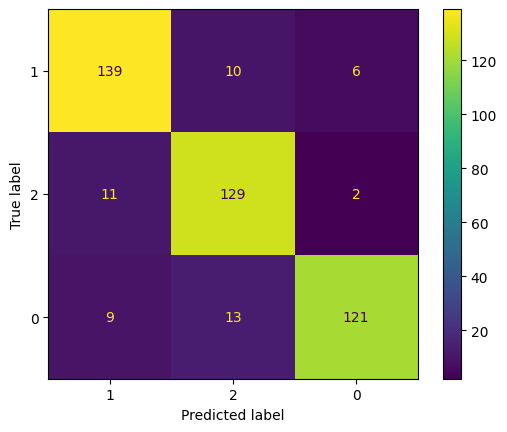

In [5]:
# Compute and print the confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

from sklearn.metrics import ConfusionMatrixDisplay
cn1 = data['stress_level'].unique() # classes_names

class_labels1 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp1 = ConfusionMatrixDisplay.from_estimator(clf1, X_test1, y_test1, display_labels=cn1)

- #### Decision Tree:

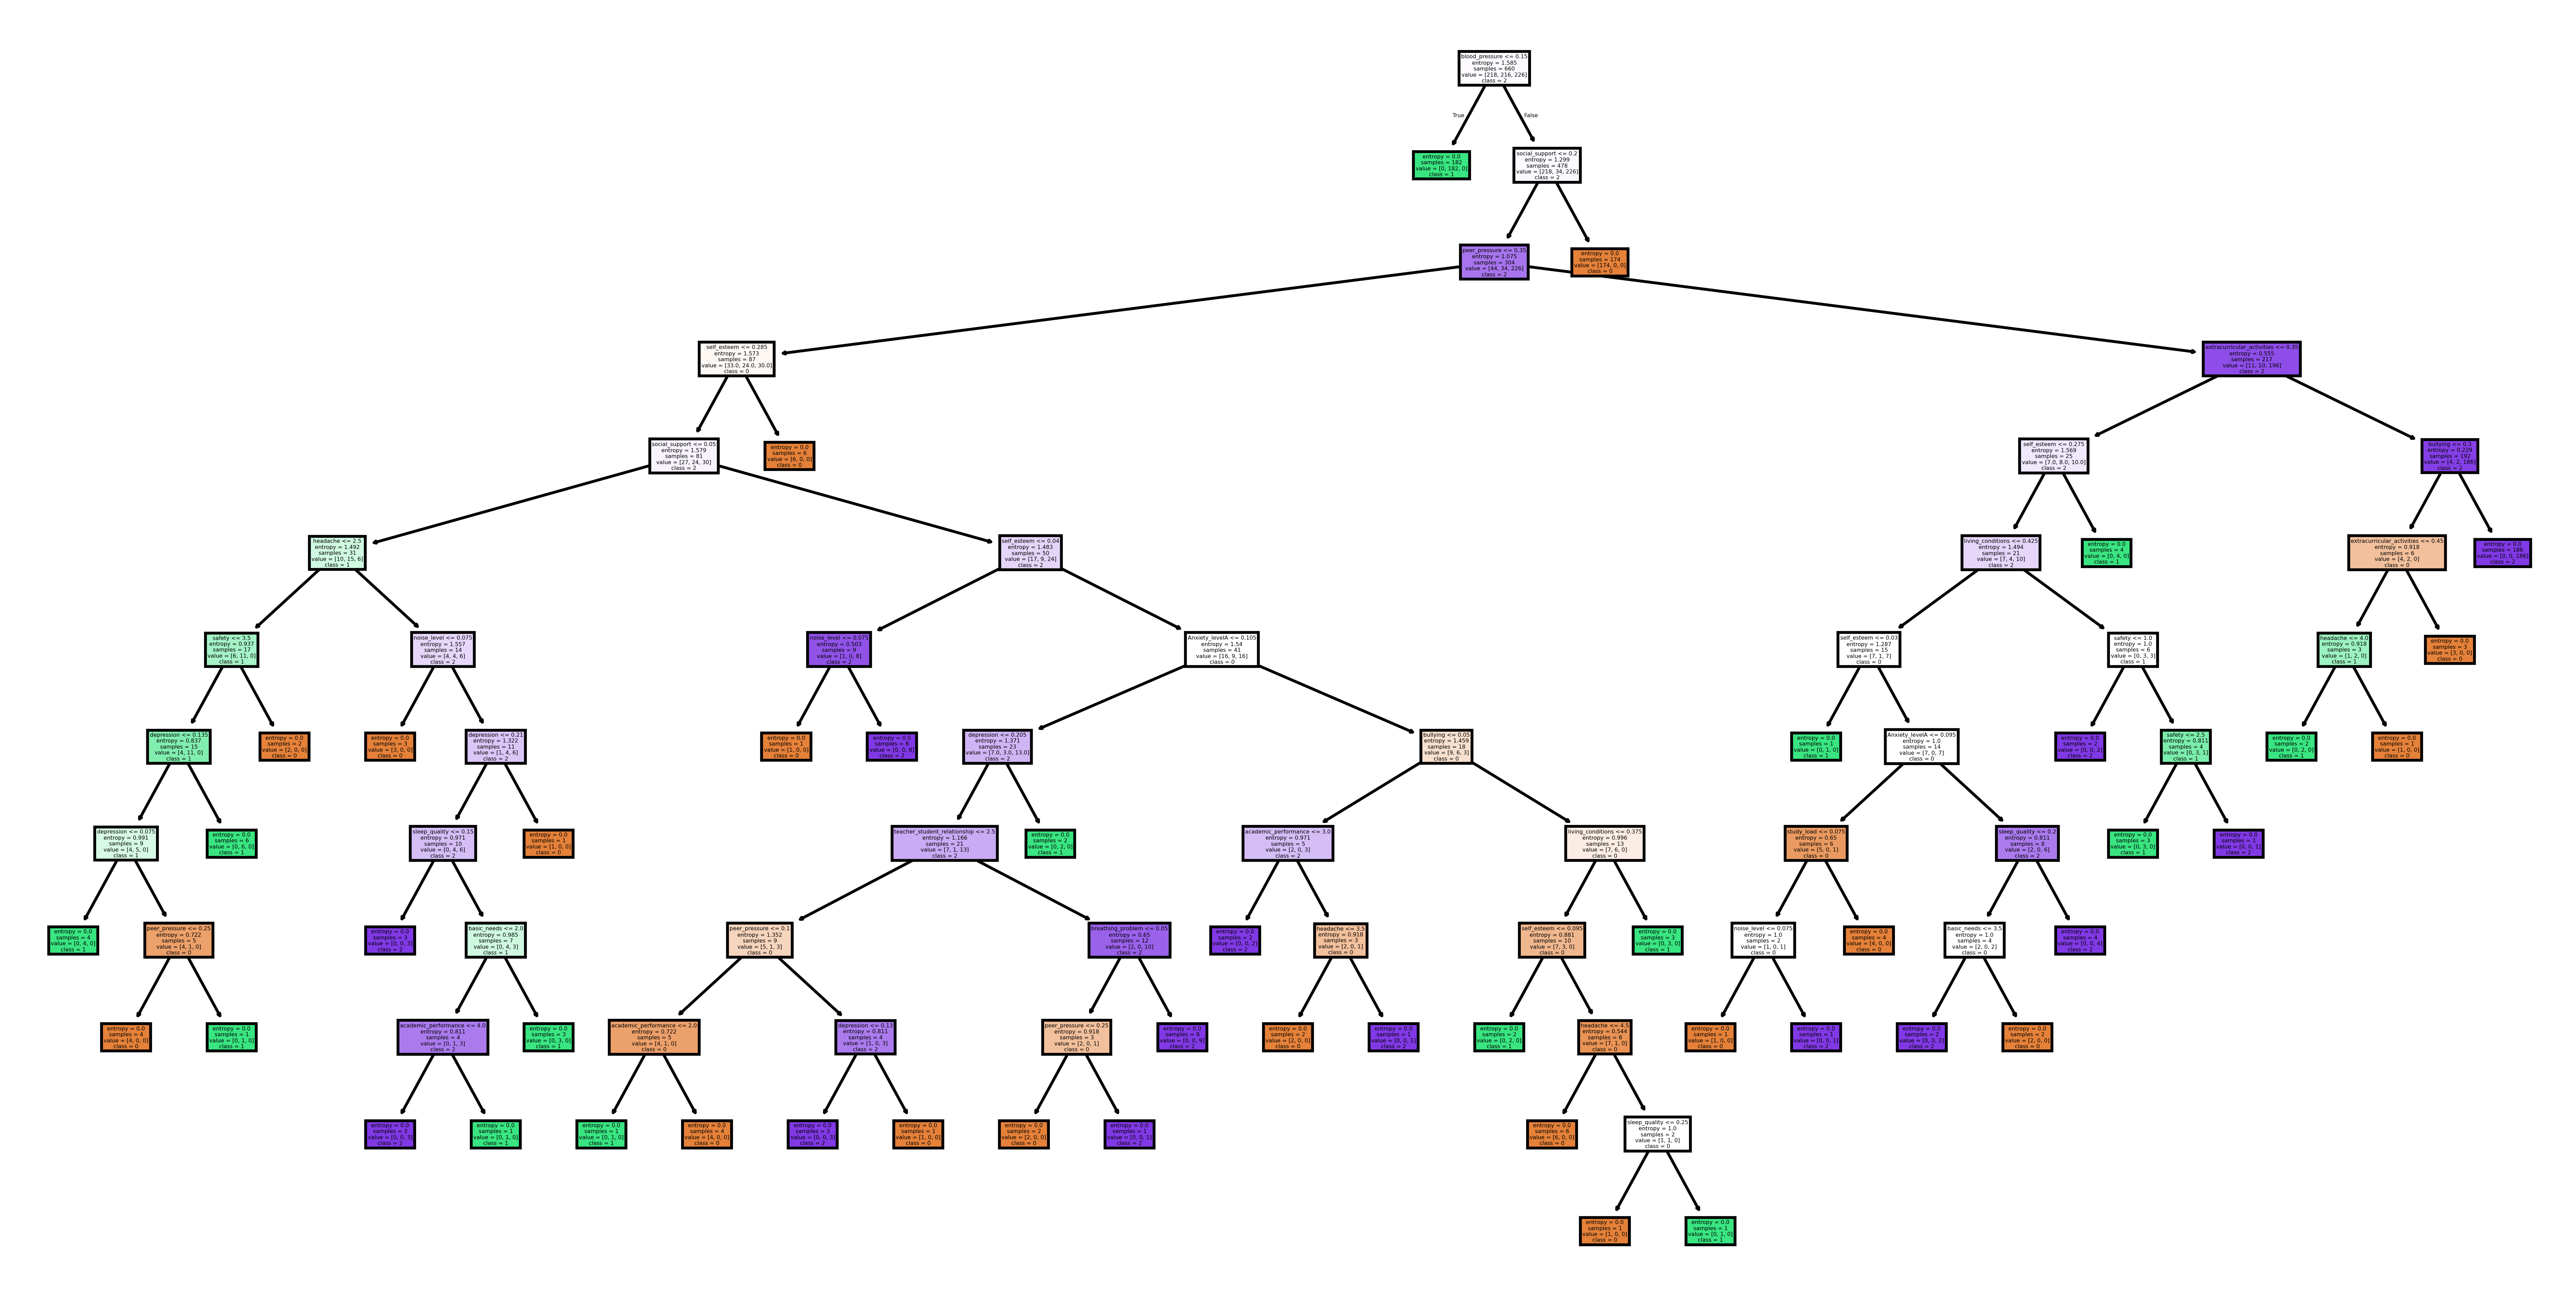

In [ ]:
# Convert all feature columns to numeric types if applicable
for col in fn1:
    data[col] = pd.to_numeric(data[col], errors='coerce')



# Re-encode the target variable as strings for compatibility with plot_tree
le1 = LabelEncoder()
y1 = le1.fit_transform(data['stress_level'])
class_names1 = [str(class_label) for class_label in le1.classes_]

# Split dataset into features and target variable
X1 = data[fn1] # Features
y1 = le1.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

# Train Decision Tree Classifier
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1.fit(X_train1, y_train1)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf1,
    feature_names=fn1,       # Ensure feature names are strings
    class_names=class_names1,  # Use encoded class names as strings
    filled=True,
)

# Display the plot
plt.show()



2. ### Medium (70% train, 30% test)

In [25]:
# Feature Selection
fn2 = data.keys().tolist()[:-1]
X2 = data[fn2]
y2 = data['stress_level']

# Encode target variable to numerical values
le2 = LabelEncoder()
y_encoded2 = le2.fit_transform(y2)

# Splitting Data into 70% training and 30% testing subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_encoded2, test_size=0.3, random_state=1)

# Building decision tree model
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train Decision Tree Classifier
clf2 = clf2.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test2, y_pred2)
error_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = metrics.precision_score(y_test2, y_pred2, average='weighted') 
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = metrics.recall_score(y_test2, y_pred2, average='weighted') 
print("Sensitivity:", sensitivity)

# Calculate Specificity
cm = confusion_matrix(y_test2, y_pred2)

# For binary classification (if applicable)
if cm.shape == (2, 2):  # Ensure it's a binary classification
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print("Specificity:", specificity)
else:
    print("Specificity is not defined directly for multiclass problems.")


Accuracy: 0.8727272727272727
Error Rate: 0.12727272727272732
Precision: 0.8730967864485565
Sensitivity: 0.8727272727272727
Specificity is not defined directly for multiclass problems.


- #### Confusion matrix

[[99  9  6]
 [ 9 95  5]
 [ 5  8 94]]


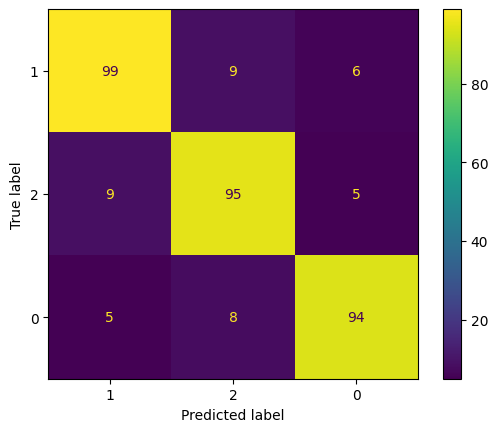

In [8]:
# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

from sklearn.metrics import ConfusionMatrixDisplay
cn2 = data['stress_level'].unique() # classes_names

class_labels2 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp2 = ConfusionMatrixDisplay.from_estimator(clf2, X_test2, y_test2, display_labels=cn2)

- #### Decision Tree:

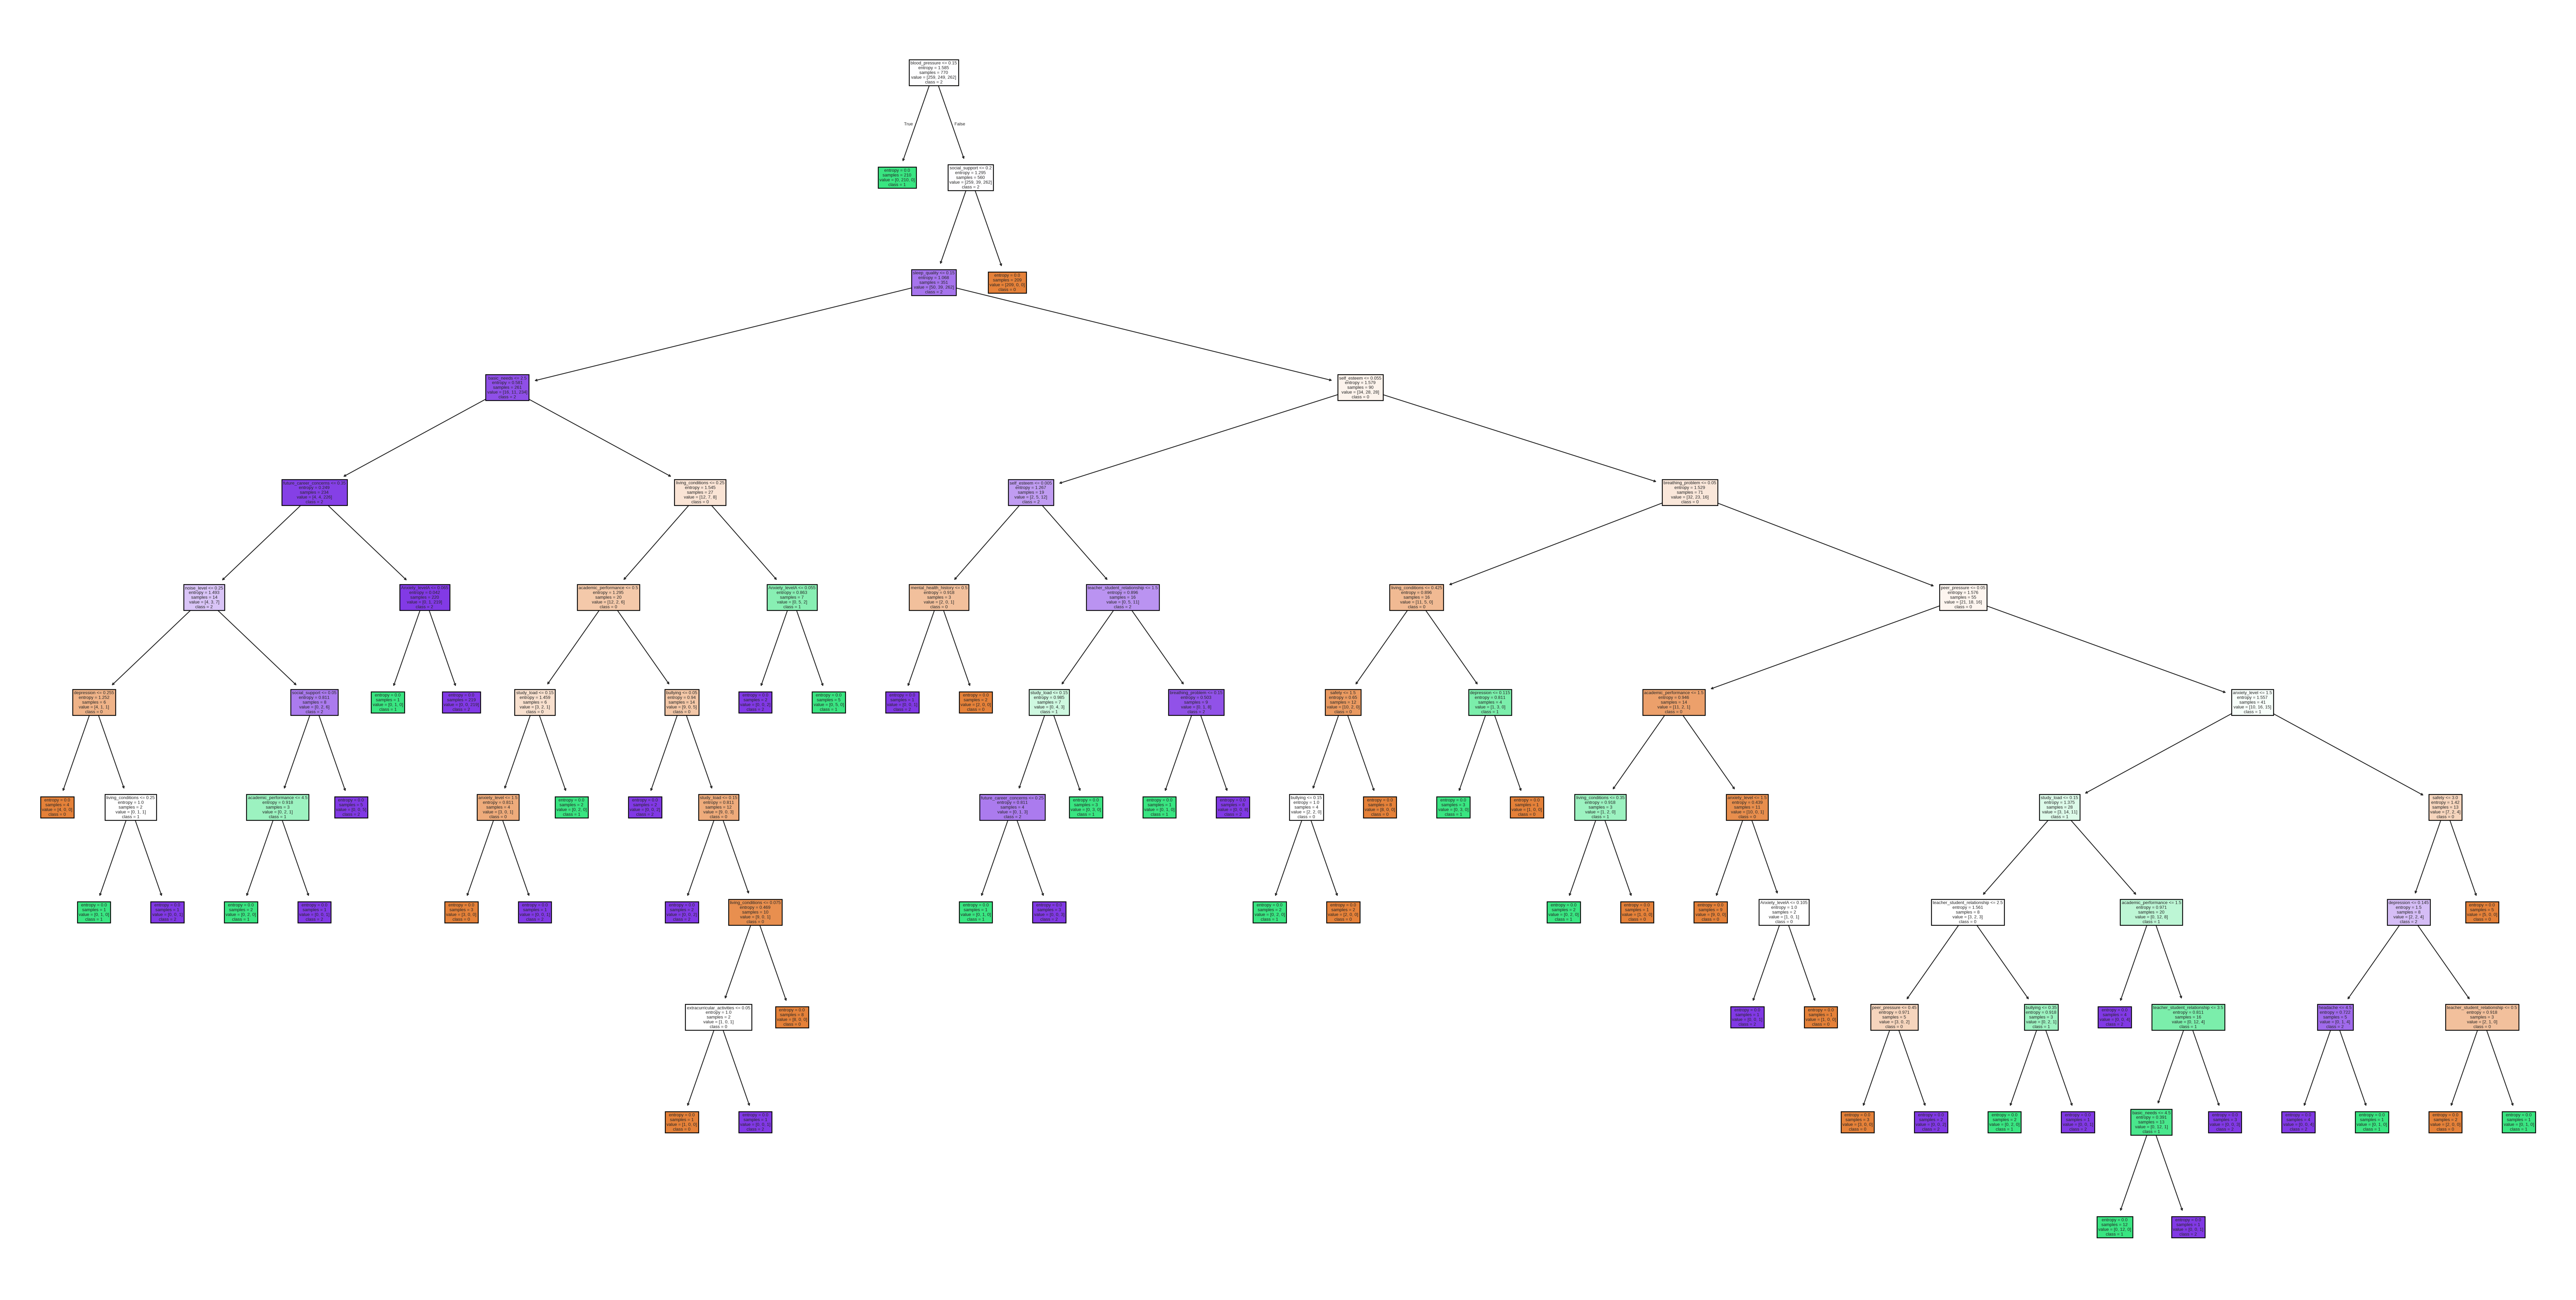

In [121]:
# Convert all feature columns to numeric types if applicable
for col in fn2:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le2 = LabelEncoder()
y2 = le2.fit_transform(data['stress_level'])
class_names2 = [str(class_label) for class_label in le2.classes_]

# Split dataset into features and target variable
X2 = data[fn2] # Features
y2 = le2.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

# Train Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion="entropy", random_state=1)
clf2.fit(X_train2, y_train2)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf2,
    feature_names=fn2,       # Ensure feature names are strings
    class_names=class_names2,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


3. ### Large (80% train, 20% test)

In [26]:
# Feature Selection
fn3 = data.keys().tolist()[1:-1]  # Selecting columns from index 1 to the second-to-last column
X3 = data[fn3]
y3 = data['stress_level']

# Encode target variable to numerical values
le3 = LabelEncoder()
y_encoded3 = le3.fit_transform(y3)

# Splitting Data into 80% training and 20% testing subsets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_encoded3, test_size=0.2, random_state=1)

# Building decision tree model
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train Decision Tree Classifier
clf3 = clf3.fit(X_train3, y_train3)

# Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test3, y_pred3)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = precision_score(y_test3, y_pred3, average='weighted') 
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = recall_score(y_test3, y_pred3, average='weighted') 
print("Sensitivity:", sensitivity)

# Calculate Specificity (for binary classification only)
cm = confusion_matrix(y_test3, y_pred3)

if cm.shape == (2, 2):  # Ensure binary classification
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print("Specificity:", specificity)
else:
    print("Specificity calculation is not defined for multiclass problems.")


Accuracy: 0.8454545454545455
Error Rate: 0.15454545454545454
Precision: 0.8492498514557337
Sensitivity: 0.8454545454545455
Specificity calculation is not defined for multiclass problems.


- #### Confusion matrix

[[63  5  6]
 [ 8 62  1]
 [10  4 61]]


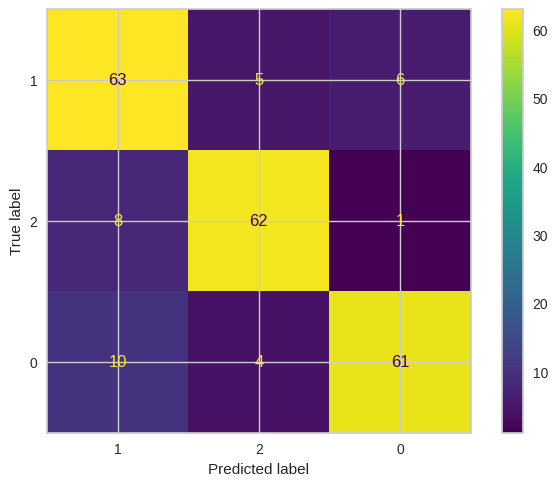

In [123]:
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay
cn3 = data['stress_level'].unique() # classes_names

class_labels3 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3, X_test3, y_test3, display_labels=cn3)

- #### Decision Tree:

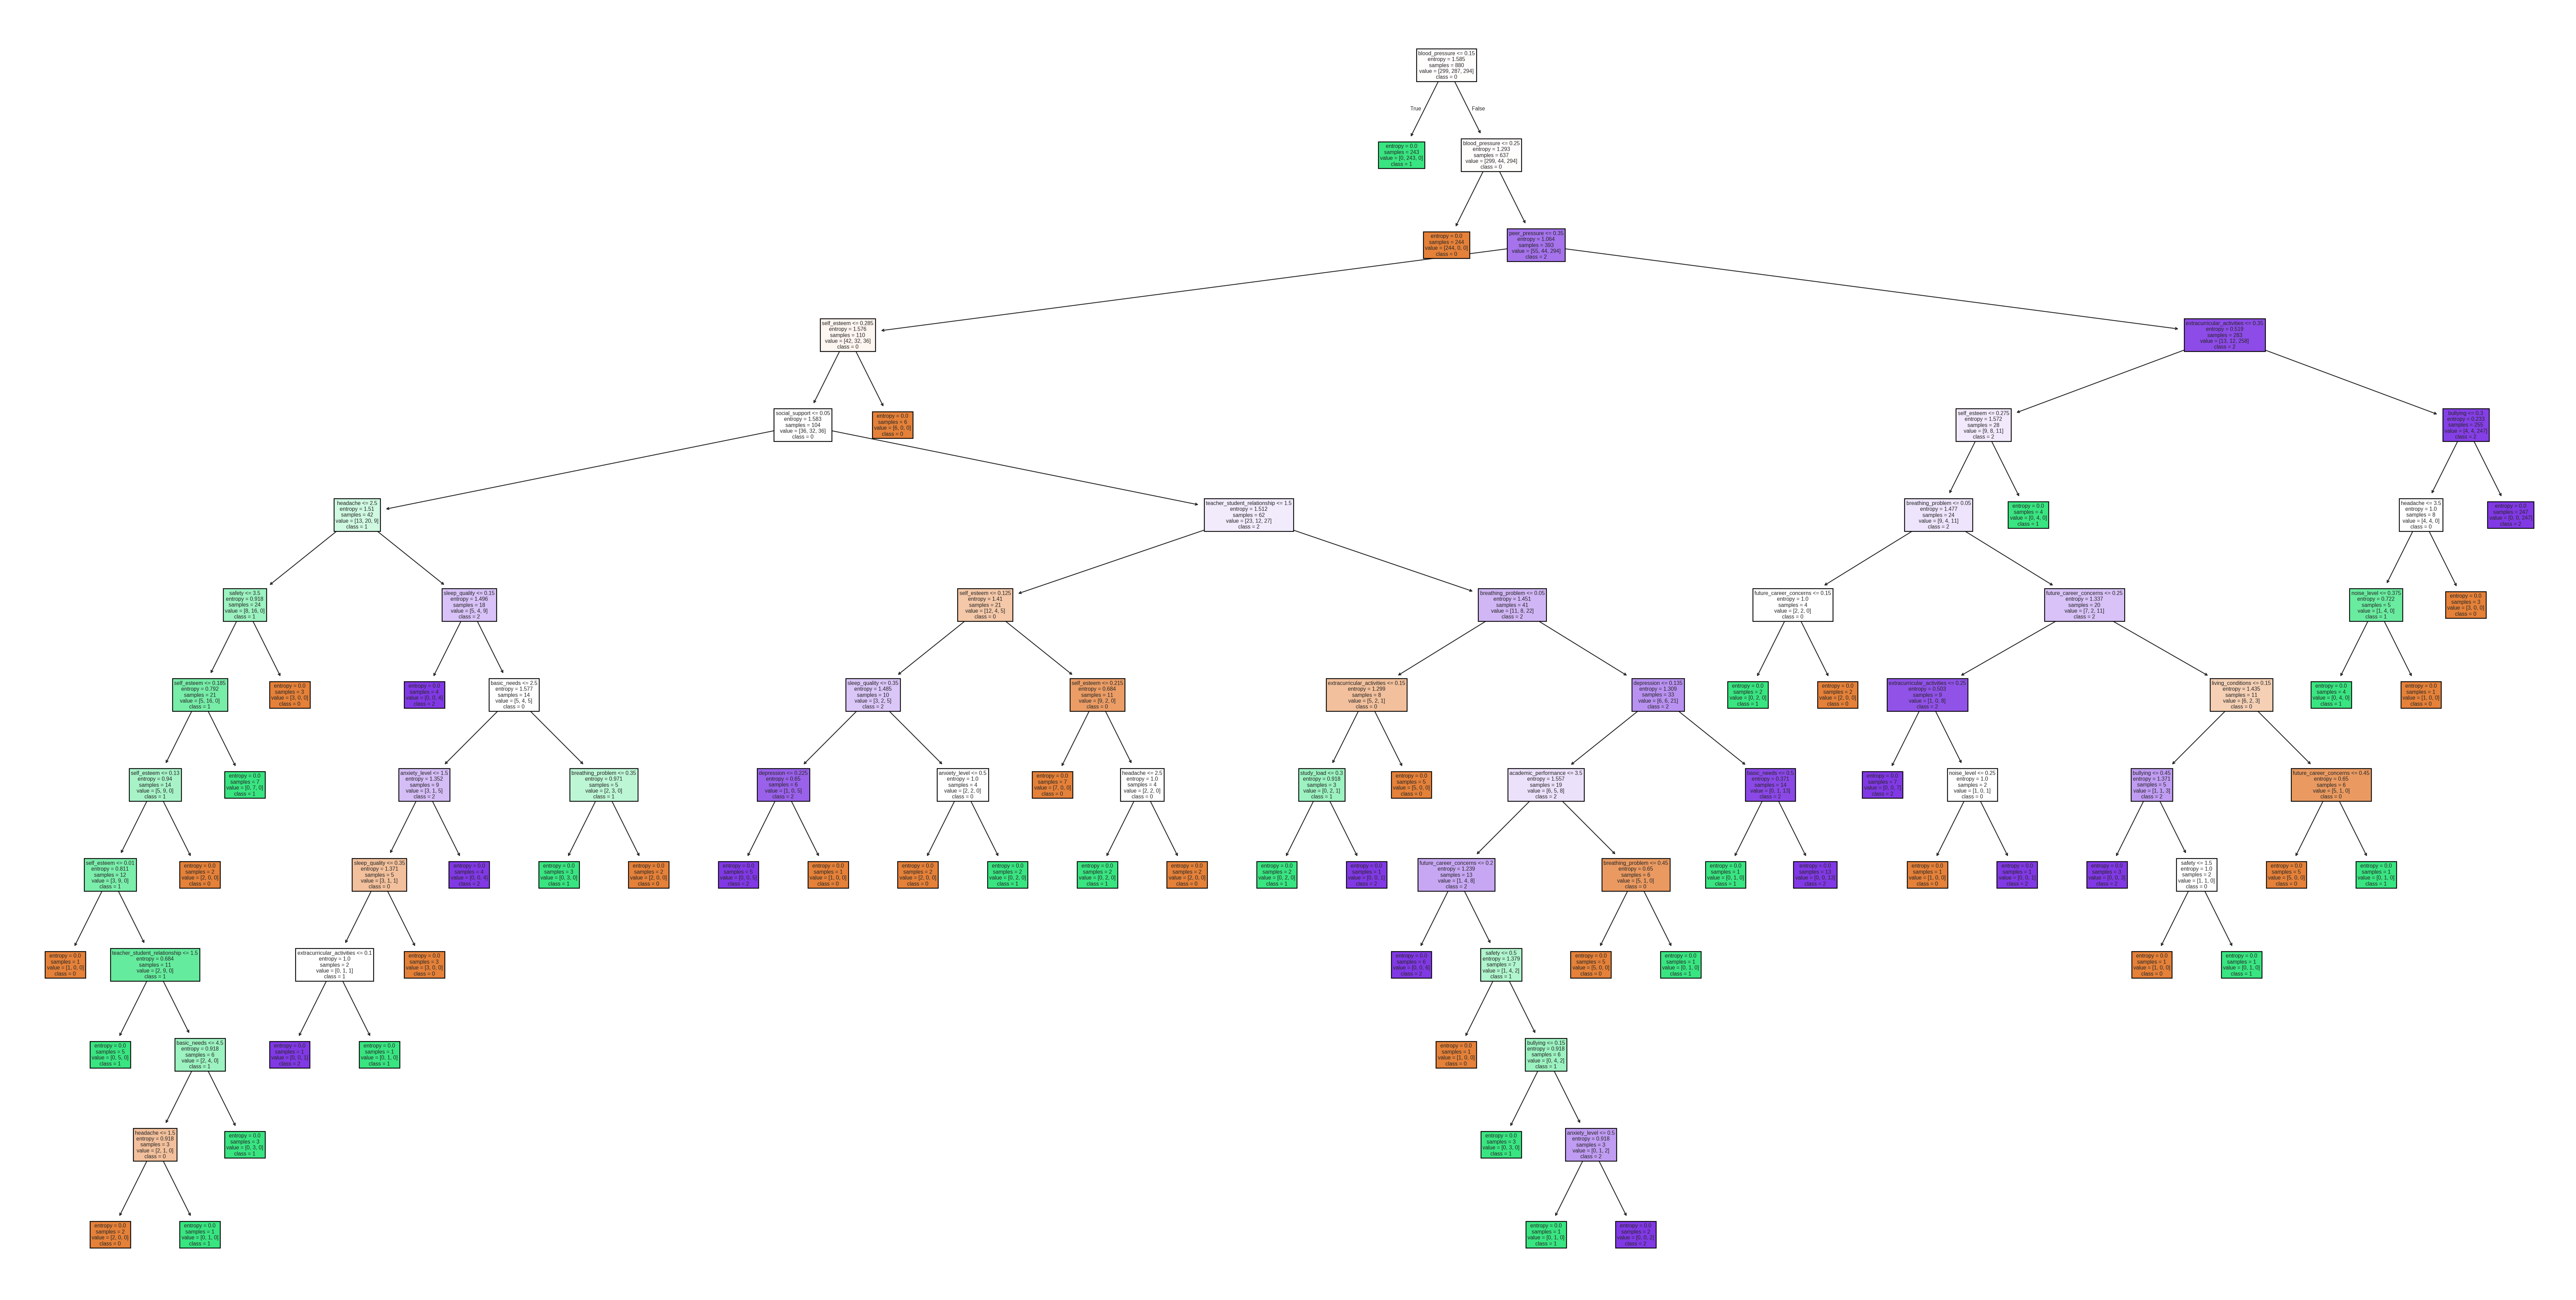

In [124]:
# Convert all feature columns to numeric types if applicable
for col in fn3:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le3 = LabelEncoder()
y3 = le3.fit_transform(data['stress_level'])
class_names3 = [str(class_label) for class_label in le3.classes_]

# Split dataset into features and target variable
X3 = data[fn3] # Features
y3 = le3.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

# Train Decision Tree Classifier
clf3 = DecisionTreeClassifier(criterion="entropy")
clf3.fit(X_train3, y_train3)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf3,
    feature_names=fn3,       # Ensure feature names are strings
    class_names=class_names3,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


Information Gain (entropy) results



The model was evaluated using three different training/testing set splits: Small (60% train, 40% test), Medium (70% train, 30% test), and Large (80% train, 20% test).



Accuracy and Error Rate were calculated for each split.

Small (60% train, 40% test)

Accuracy: 88.41%; Error Rate: 11.59%



Medium (70% train, 30% test):

Accuracy: 88.41%; Error Rate: 11.59%



Large (80% train, 20% test):

Accuracy: 88.41%; Error Rate: 11.59%



Overall Performance:

The model's performance using the Information Gain (entropy) was remarkably consistent across all three dataset splits.  The accuracy remained at approximately 88.41%, and the error rate remained at approximately 11.59%.



This unusual consistency suggests that the dataset's characteristics or the model's complexity might be influencing the results, making the model relatively insensitive to the size of the training set within the range tested.



### Gini Index

1. ### Small (60% train, 40% test)

In [ ]:
# Feature Selection
fn1 = data.keys().tolist()[1:-1]  # Selecting columns from index 1 to the second-to-last column
X1 = data[fn1]
y1 = data['stress_level']

# Encode target variable to numerical values
le1 = LabelEncoder()
y_encoded1 = le1.fit_transform(y1)

# Splitting Data into 60% training and 40% testing subsets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_encoded1, test_size=0.4, random_state=1)

# Building decision tree model
clf1 = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf1 = clf1.fit(X_train1, y_train1)

# Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

# Calculate error rate
error_rate = 1 - accuracy

# Print Accuracy and Error Rate
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = precision_score(y_test1, y_pred1, average='weighted')
print("Precision:", precision)

# Calculate Sensitivity 
sensitivity = recall_score(y_test1, y_pred1, average='weighted') 
print("Sensitivity:", sensitivity)

# Calculate Specificity (for binary classification only)
cm = confusion_matrix(y_test1, y_pred1)

if cm.shape == (2, 2):  # Ensure binary classification
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print("Specificity:", specificity)
else:
    print("Specificity calculation is not defined for multiclass problems.")


Accuracy: 0.8704545454545455
Error Rate: 0.12954545454545452
Precision: 0.8712010749060061
Sensitivity: 0.8704545454545455
Specificity calculation is not defined for multiclass problems.


- #### Confusion matrix

[[139   9   7]
 [ 11 122   9]
 [ 14   7 122]]


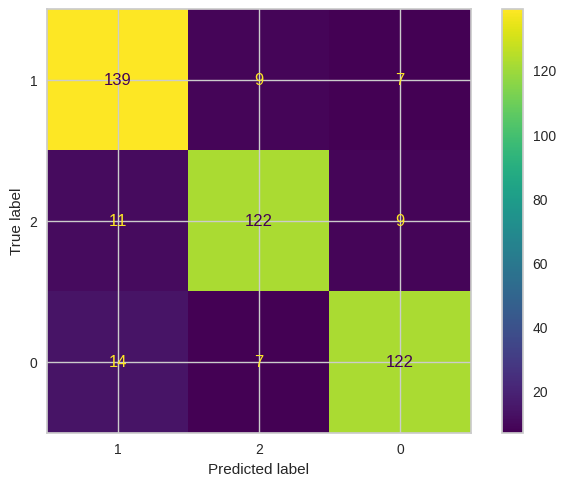

In [126]:
# Compute and print the confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

from sklearn.metrics import ConfusionMatrixDisplay
cn1 = data['stress_level'].unique() # classes_names

class_labels1 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp1 = ConfusionMatrixDisplay.from_estimator(clf1, X_test1, y_test1, display_labels=cn1)

- #### Decision Tree:

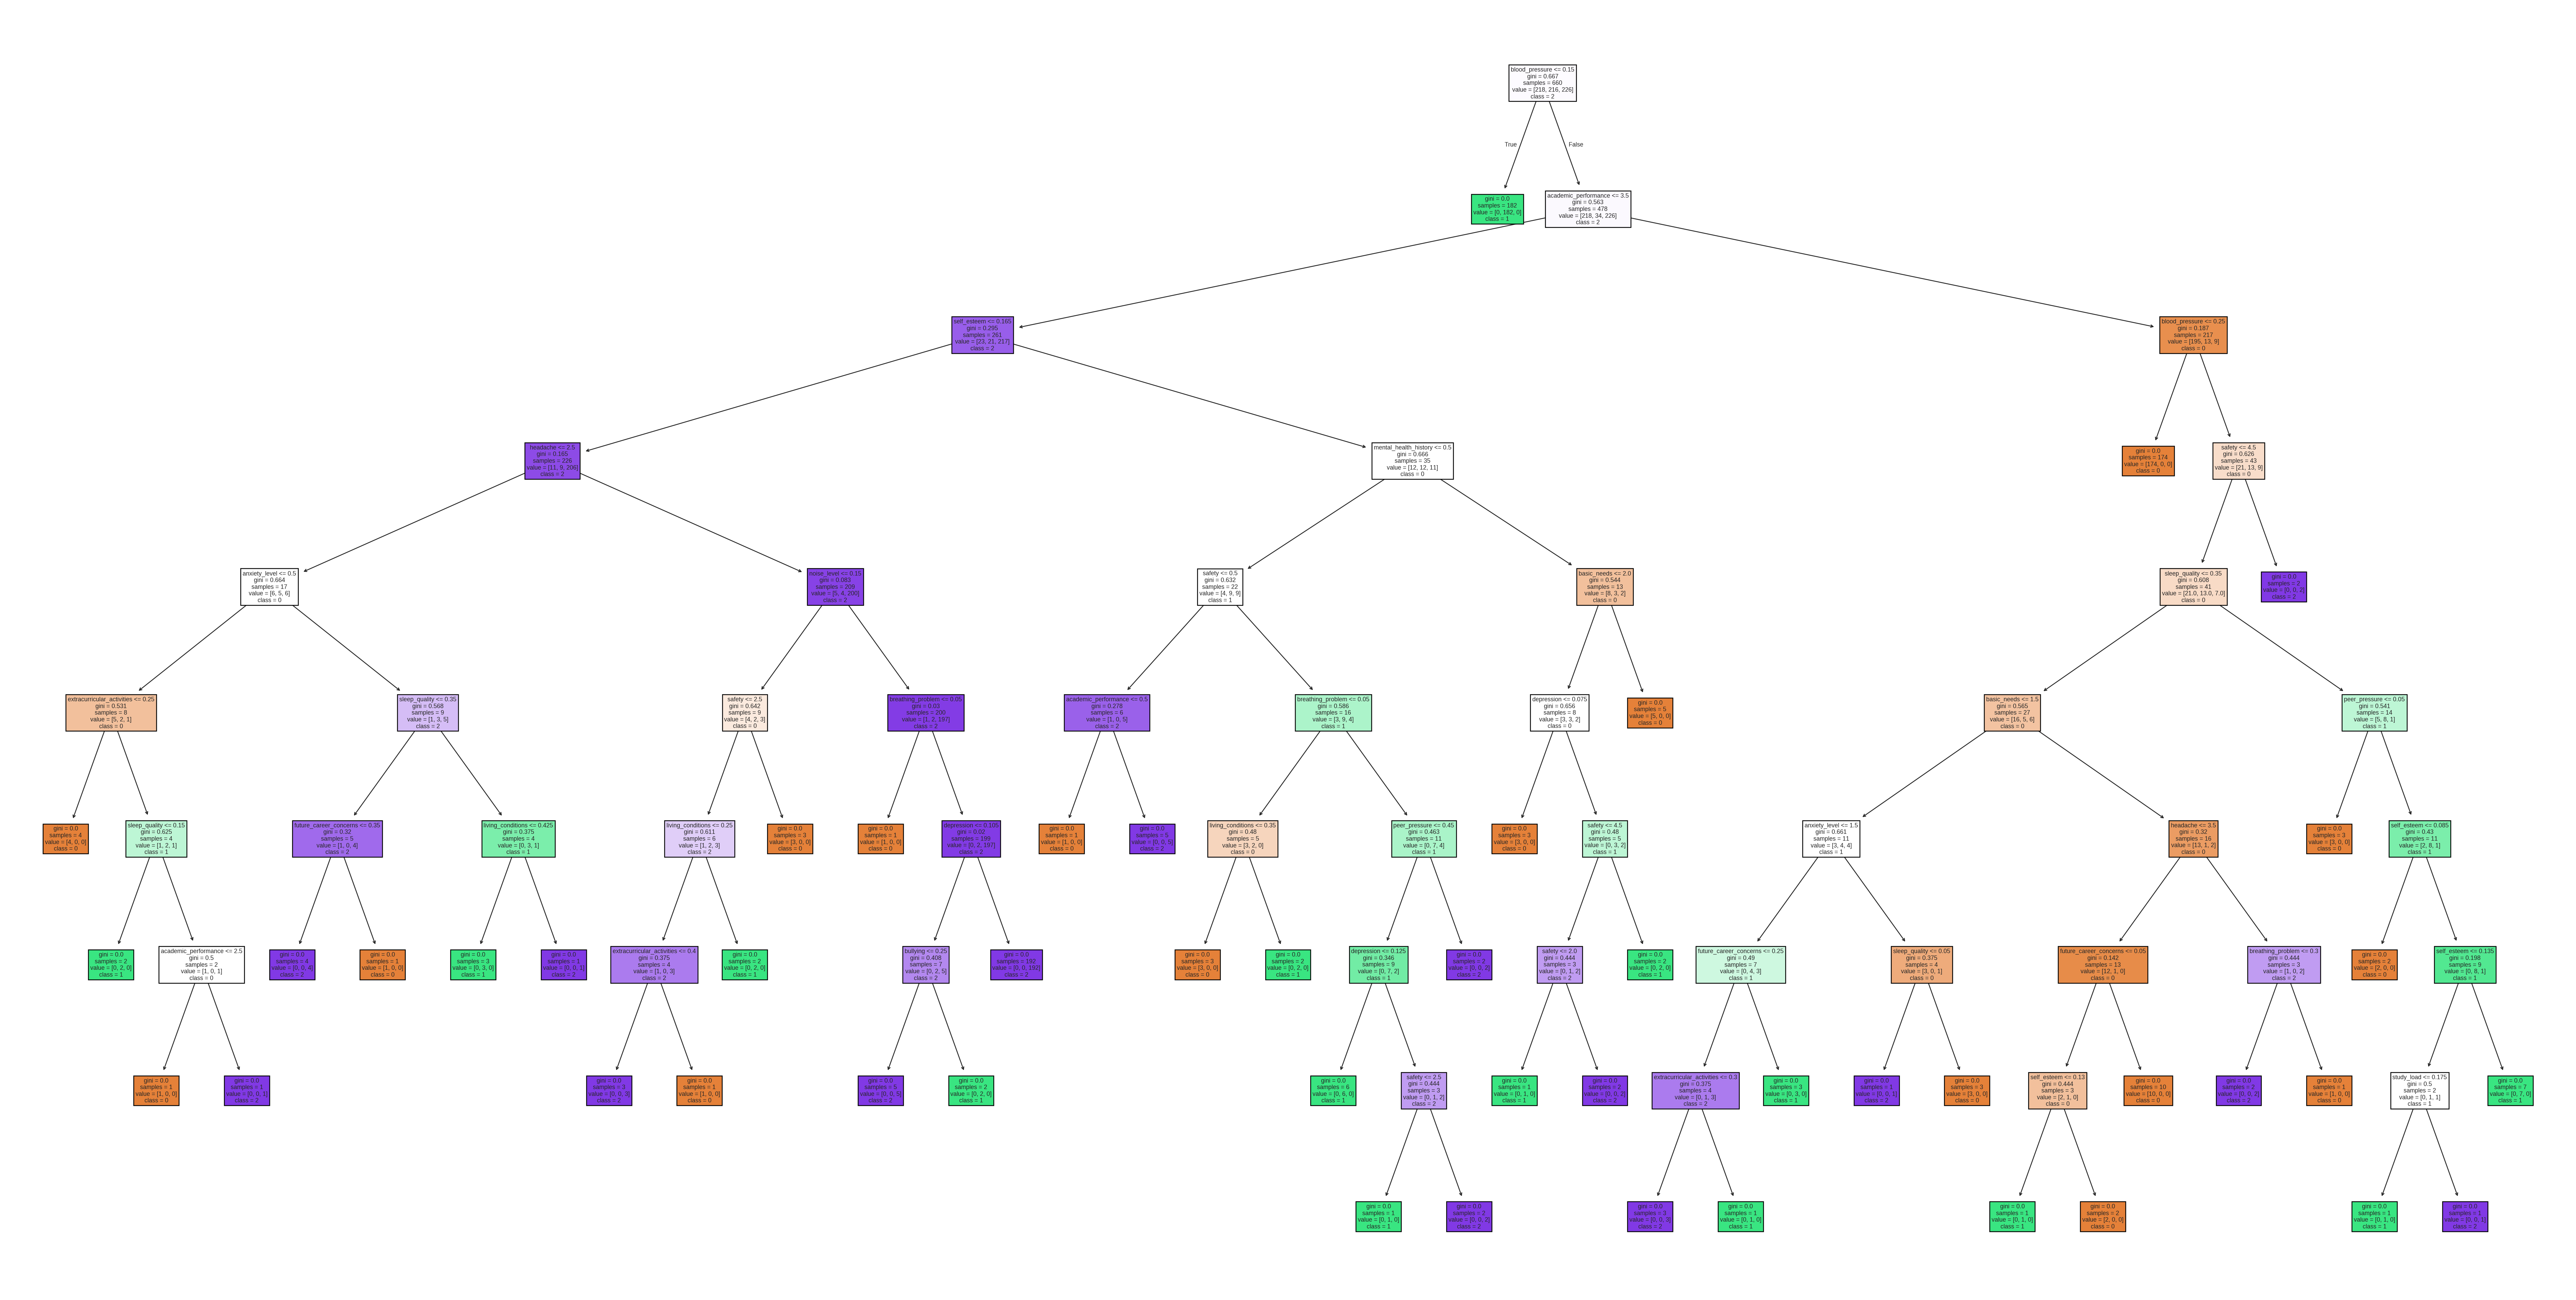

In [127]:
# Convert all feature columns to numeric types if applicable
for col in fn1:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le1 = LabelEncoder()
y1 = le1.fit_transform(data['stress_level'])
class_names1 = [str(class_label) for class_label in le1.classes_]

# Split dataset into features and target variable
X1 = data[fn1] # Features
y1 = le1.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

# Train Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train1, y_train1)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf1,
    feature_names=fn1,       # Ensure feature names are strings
    class_names=class_names1,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()



2. ### Medium (70% train, 30% test)

In [29]:
# Feature Selection
fn2 = data.keys().tolist()[1:-1]
X2 = data[fn2]
y2 = data['stress_level']

# Encode target variable to numerical values
le2 = LabelEncoder()
y_encoded2 = le2.fit_transform(y2)

# Splitting Data into 70% training and 30% testing subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_encoded2, test_size=0.3, random_state=1)

# Building decision tree model
clf2 = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf2 = clf2.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test2, y_pred2)

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = metrics.precision_score(y_test2, y_pred2, average='weighted')  
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = metrics.recall_score(y_test2, y_pred2, average='weighted')  
print("Sensitivity:", sensitivity)

# Calculate Specificity (for binary classification only)
cm = metrics.confusion_matrix(y_test2, y_pred2)

if cm.shape == (2, 2):  # Ensure binary classification
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print("Specificity:", specificity)
else:
    print("Specificity calculation is not defined for multiclass problems.")


Accuracy: 0.8545454545454545
Error Rate: 0.1454545454545455
Precision: 0.8551040892328772
Sensitivity: 0.8545454545454545
Specificity calculation is not defined for multiclass problems.


- #### Confusion matrix

[[97  9  8]
 [ 8 93  8]
 [ 5 10 92]]


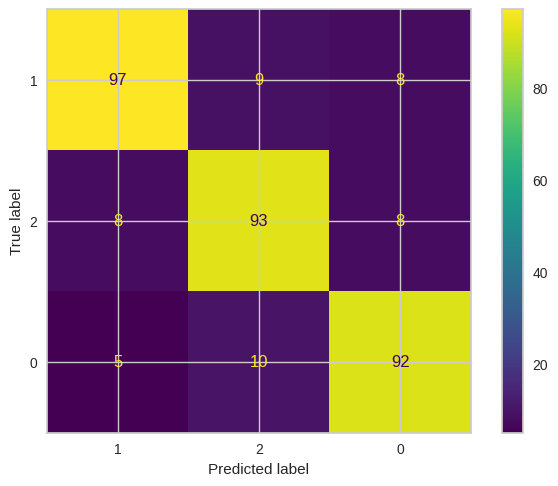

In [129]:
# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

from sklearn.metrics import ConfusionMatrixDisplay
cn2 = data['stress_level'].unique() # classes_names

class_labels2 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp2 = ConfusionMatrixDisplay.from_estimator(clf2, X_test2, y_test2, display_labels=cn2)

- #### Decision Tree:

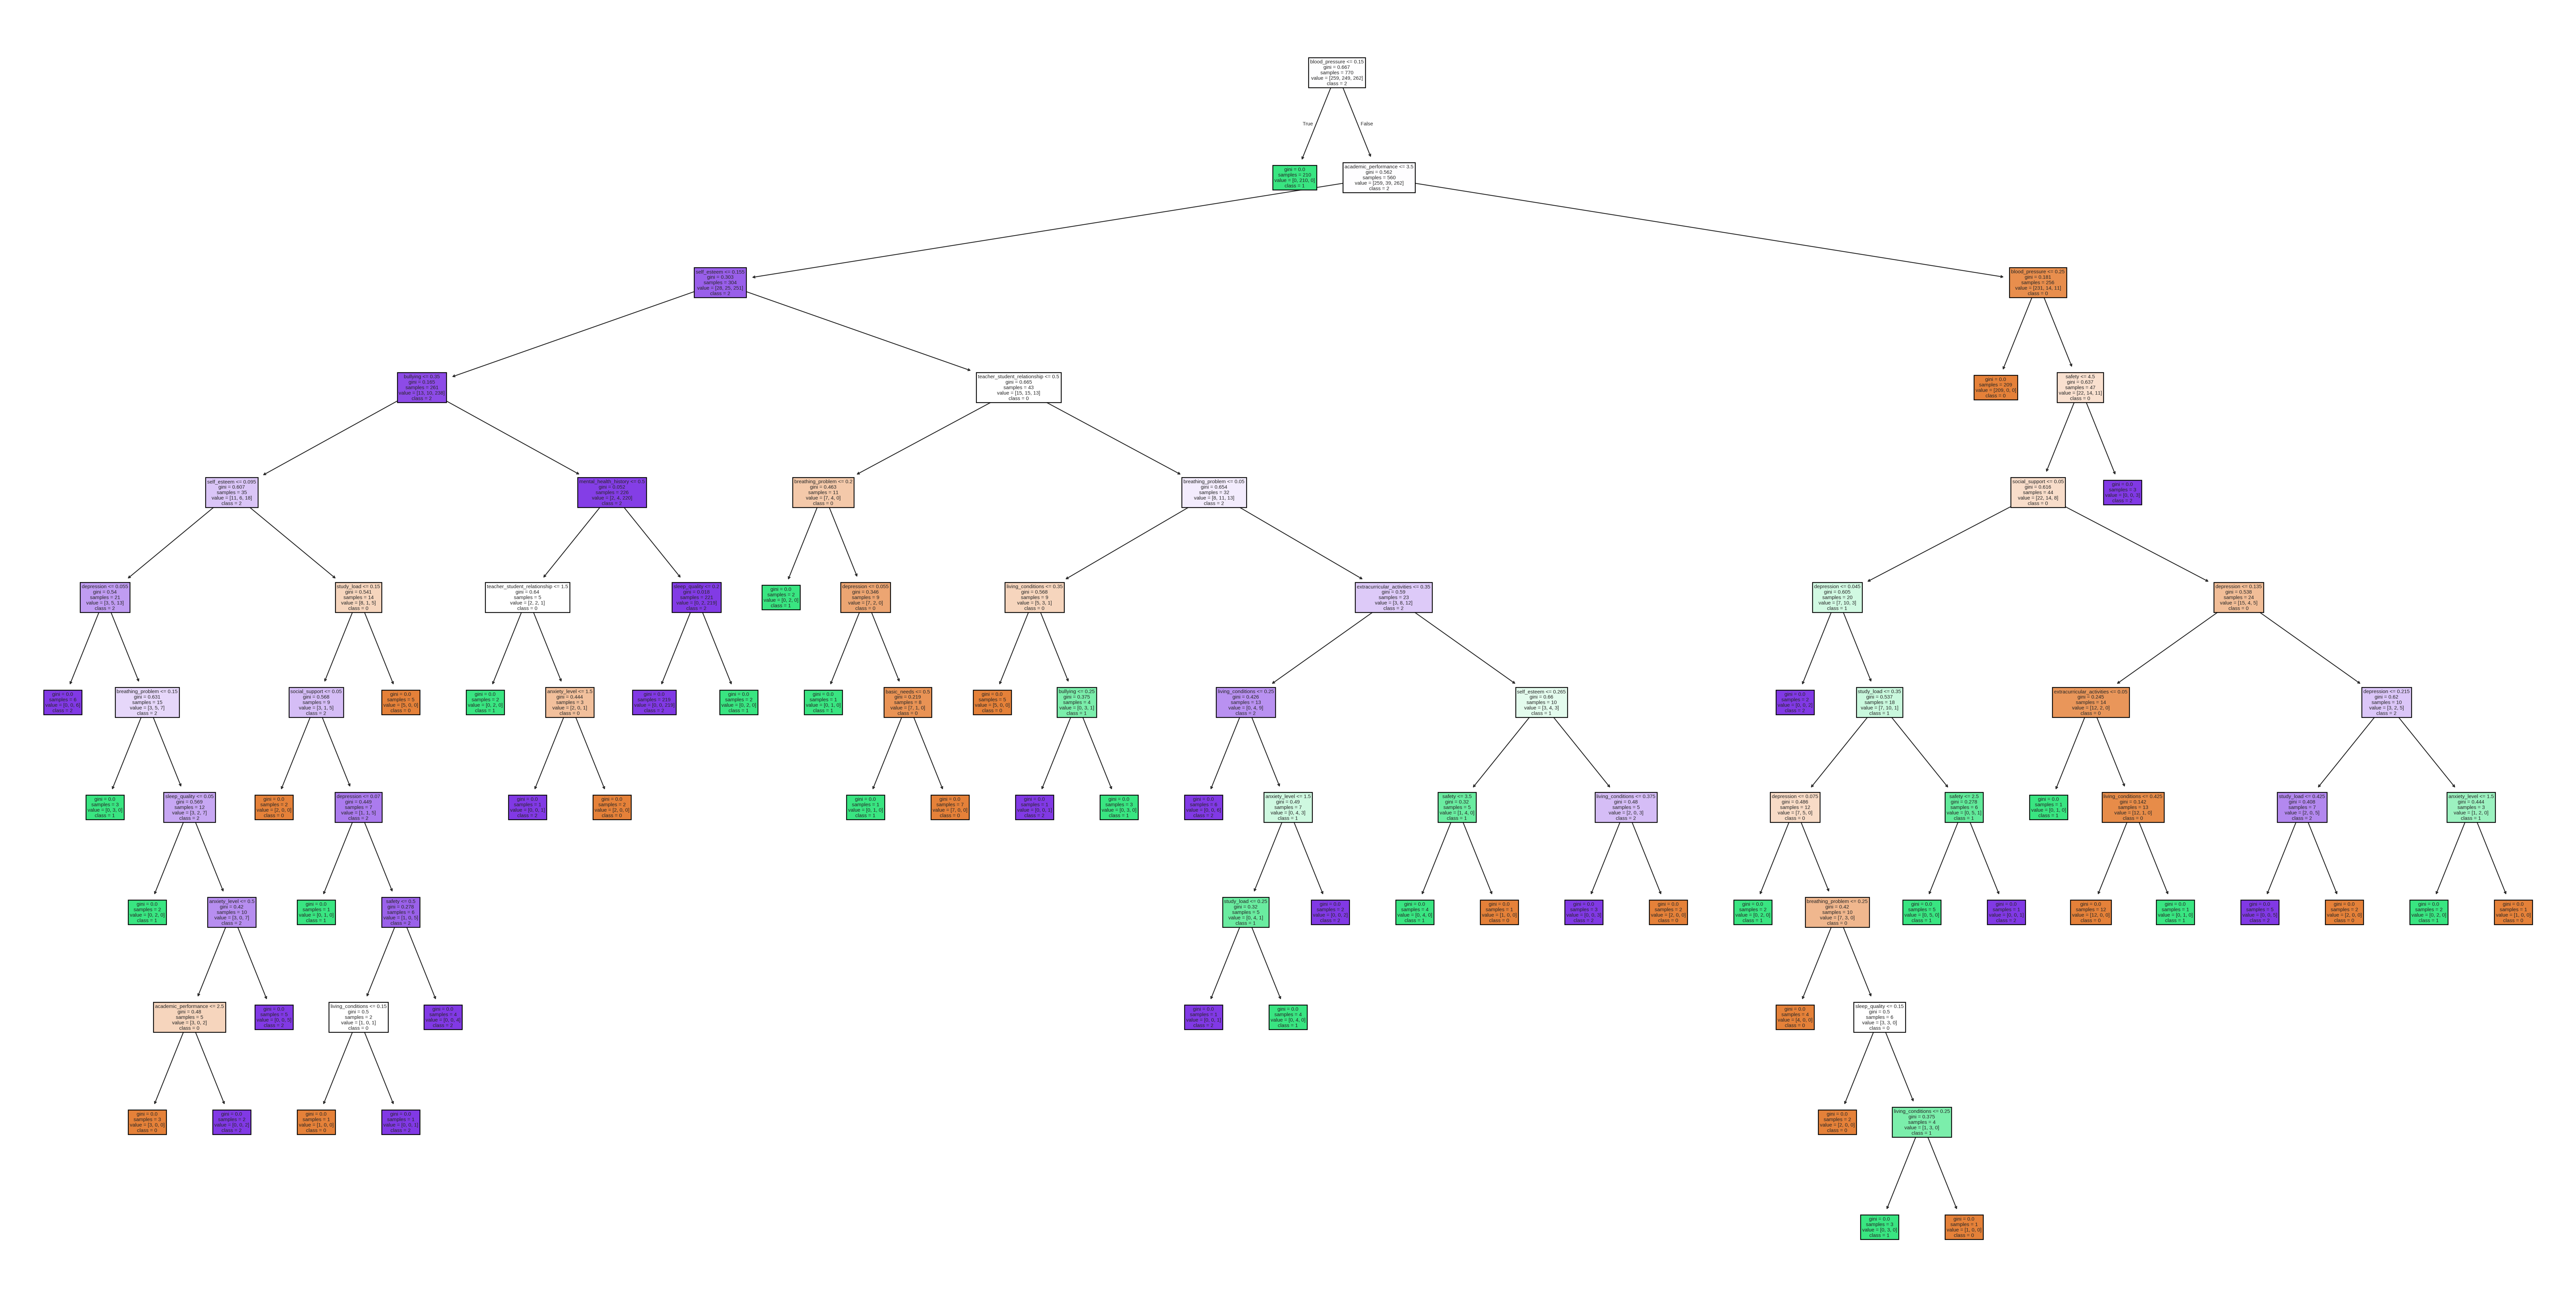

In [130]:
# Convert all feature columns to numeric types if applicable
for col in fn2:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le2 = LabelEncoder()
y2 = le2.fit_transform(data['stress_level'])
class_names2 = [str(class_label) for class_label in le2.classes_]

# Split dataset into features and target variable
X2 = data[fn2] # Features
y2 = le2.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

# Train Decision Tree Classifier
clf2 = DecisionTreeClassifier()
clf2.fit(X_train2, y_train2)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf2,
    feature_names=fn2,       # Ensure feature names are strings
    class_names=class_names2,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


3. ### Large (80% train, 20% test)

In [30]:
# Feature Selection
fn3 = data.keys().tolist()[1:-1]
X3 = data[fn3]
y3 = data['stress_level']

# Encode target variable to numerical values
le3 = LabelEncoder()
y_encoded3 = le3.fit_transform(y3)

# Splitting Data into 80% training and 20% testing subsets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_encoded3, test_size=0.2, random_state=1)

# Building decision tree model
clf3 = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf3 = clf3.fit(X_train3, y_train3)

# Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test3, y_pred3)  # Corrected to use y_test3 and y_pred3

# Calculate error rate
error_rate = 1 - accuracy

# Evaluate model performance
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Calculate Precision
precision = metrics.precision_score(y_test3, y_pred3, average='weighted') 
print("Precision:", precision)

# Calculate Sensitivity
sensitivity = metrics.recall_score(y_test3, y_pred3, average='weighted') 
print("Sensitivity:", sensitivity)

# Calculate Specificity (for binary classification only)
cm = metrics.confusion_matrix(y_test3, y_pred3)

if cm.shape == (2, 2):  # Ensure binary classification
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print("Specificity:", specificity)
else:
    print("Specificity calculation is not defined for multiclass problems.")


Accuracy: 0.8590909090909091
Error Rate: 0.14090909090909087
Precision: 0.8593035619351409
Sensitivity: 0.8590909090909091
Specificity calculation is not defined for multiclass problems.


- #### Confusion matrix

[[63  3  8]
 [ 5 62  4]
 [ 4  7 64]]


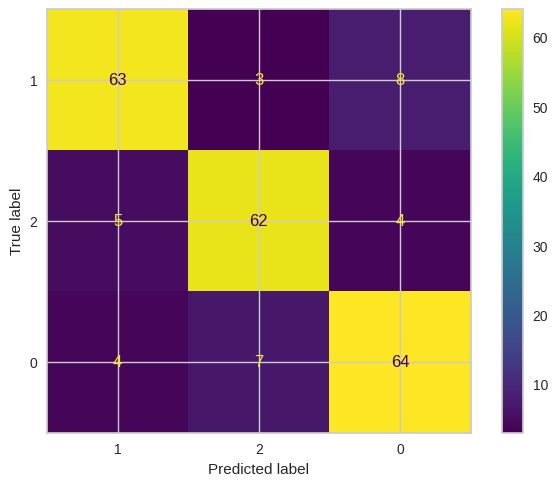

In [132]:
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay
cn3 = data['stress_level'].unique() # classes_names

class_labels3 = {0:'0', 1:'1', 2:'2'}

# create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3, X_test3, y_test3, display_labels=cn3)

- #### Decision Tree:

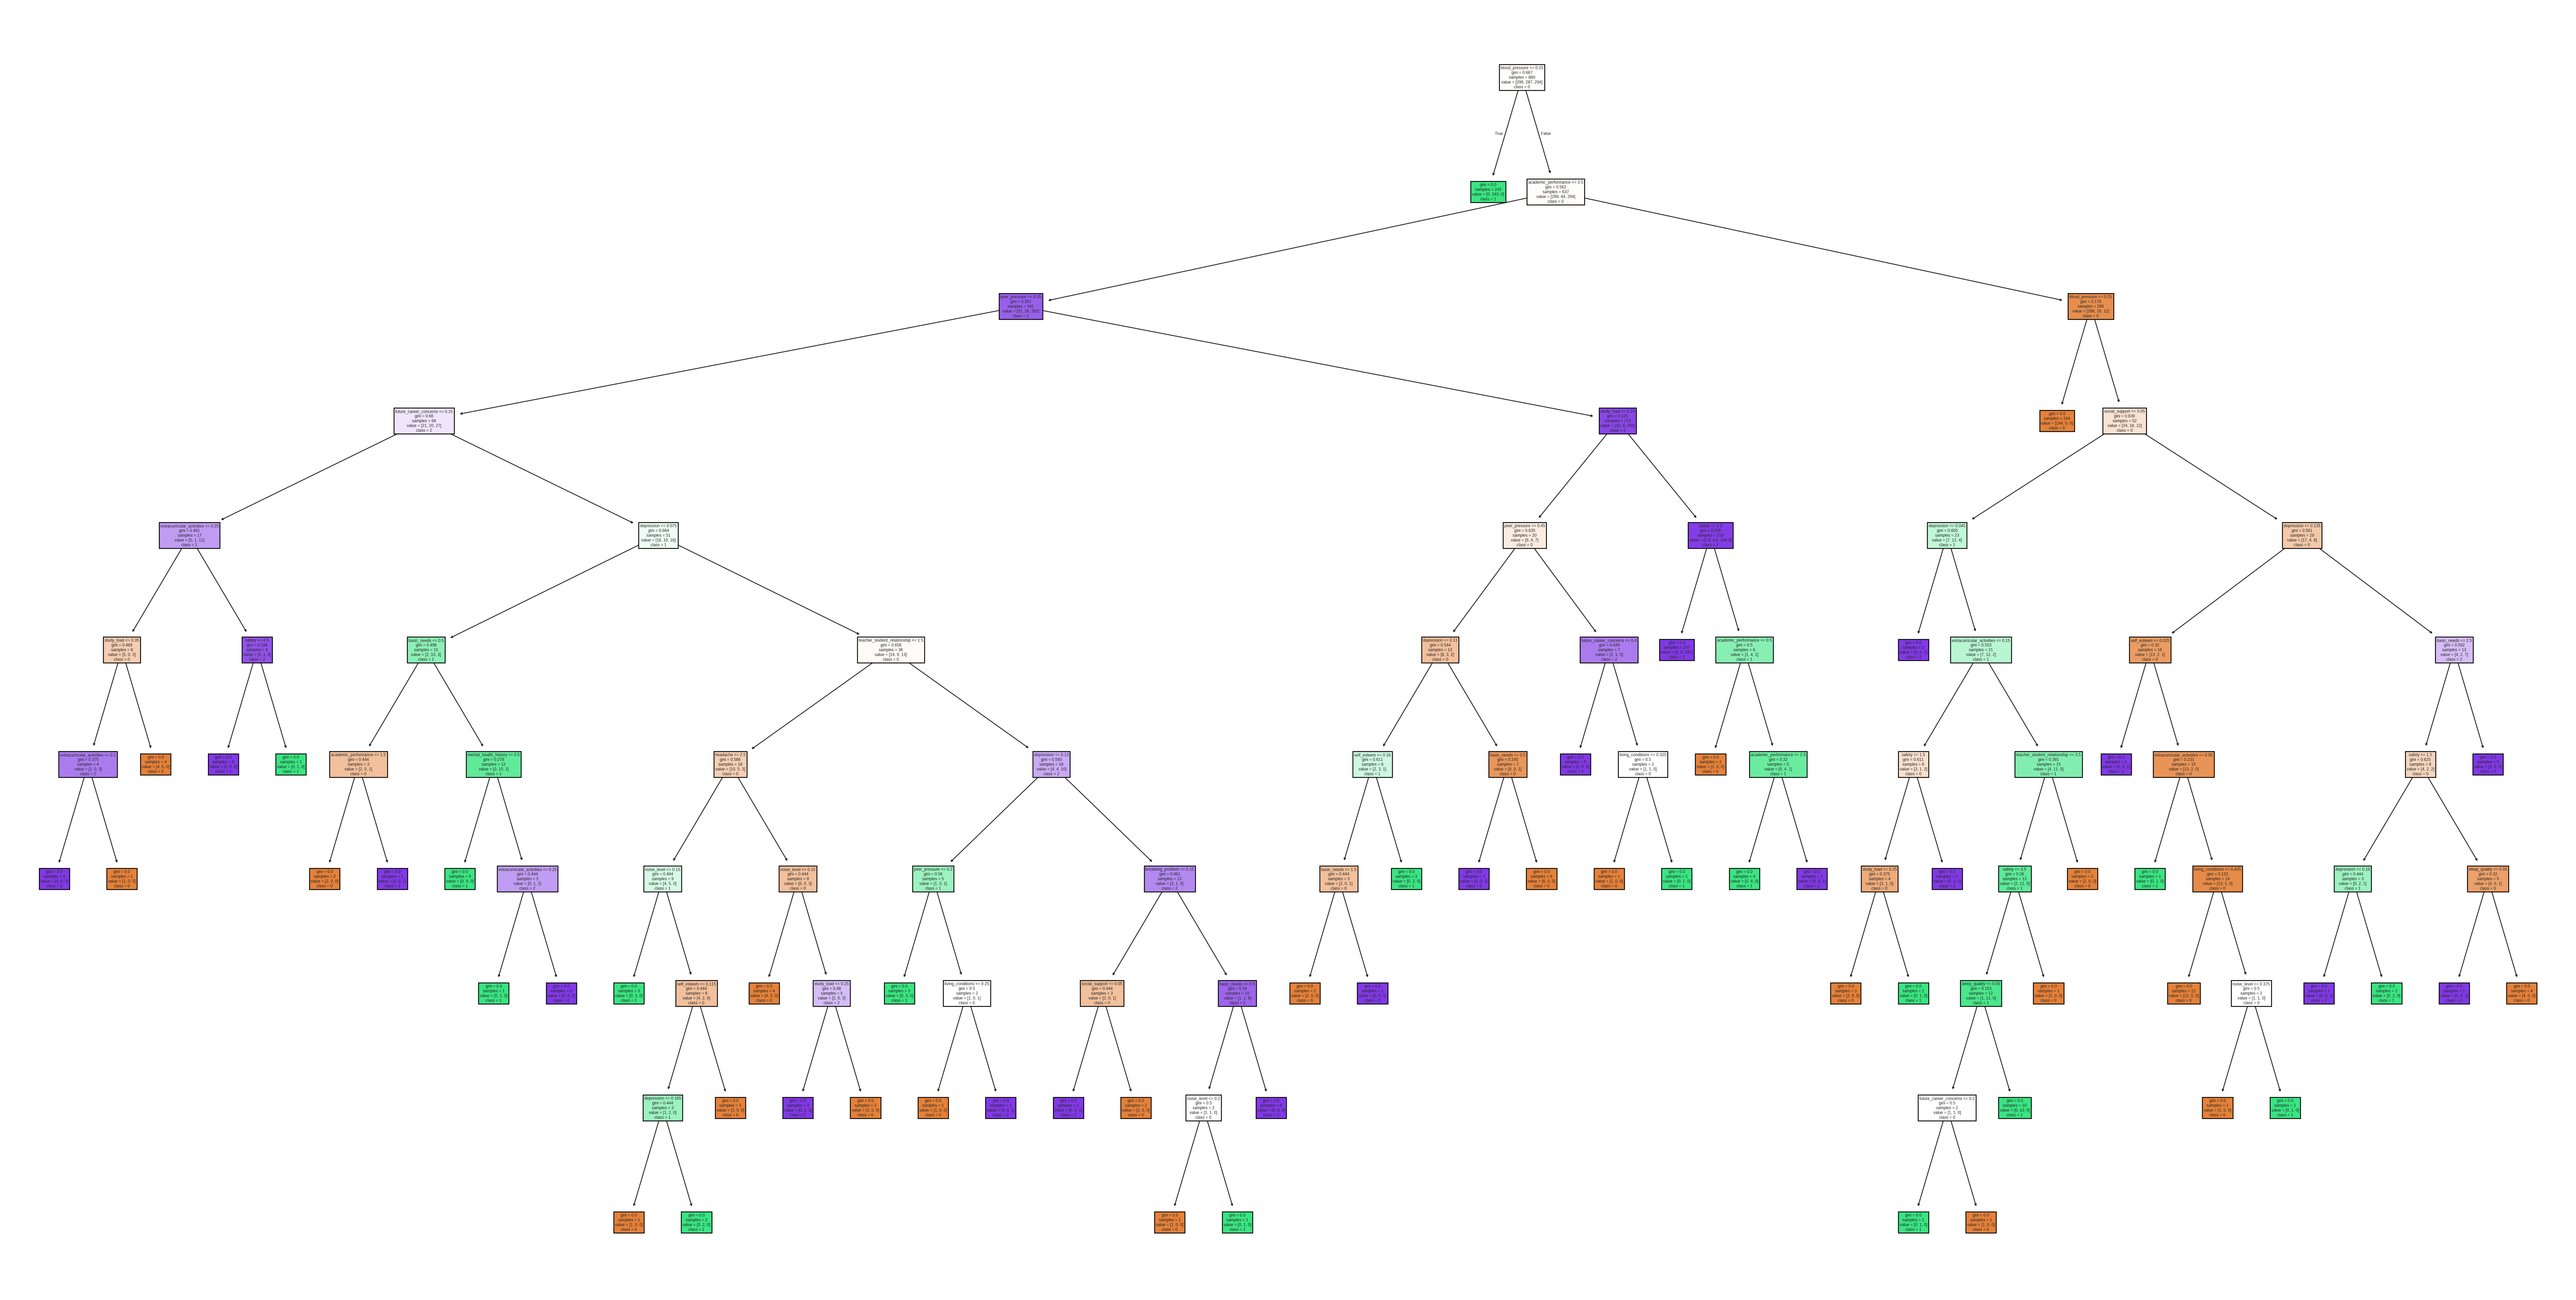

In [133]:
# Convert all feature columns to numeric types if applicable
for col in fn3:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Re-encode the target variable as strings for compatibility with plot_tree
le3 = LabelEncoder()
y3 = le3.fit_transform(data['stress_level'])
class_names3 = [str(class_label) for class_label in le3.classes_]

# Split dataset into features and target variable
X3 = data[fn3] # Features
y3 = le3.fit_transform(data['stress_level'])  # Target encoded as numbers for fitting

# Split data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

# Train Decision Tree Classifier
clf3 = DecisionTreeClassifier()
clf3.fit(X_train3, y_train3)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), dpi=600)

# Plot the decision tree
tree.plot_tree(
    clf3,
    feature_names=fn3,       # Ensure feature names are strings
    class_names=class_names3,  # Use encoded class names as strings
    filled=True
)

# Display the plot
plt.show()


Gini Index results



The model was evaluated using three different training/testing set splits: Small (60% train, 40% test), Medium (70% train, 30% test), and Large (80% train, 20% test).



Accuracy and Error Rate were calculated for each split.

Small (60% train, 40% test)

Accuracy: 87.05%; Error Rate: 12.95%



Medium (70% train, 30% test):

Accuracy: 87.05%; Error Rate: 12.95%



Large (80% train, 20% test):

Accuracy: 87.05%; Error Rate: 12.95%



Overall Performance:

The model's performance using the Gini index was remarkably consistent across all three dataset splits.  The accuracy remained at approximately 87.05%, and the error rate remained at approximately 12.95%.



This unusual consistency suggests that the dataset's characteristics or the model's complexity might be influencing the results, making the model relatively insensitive to the size of the training set within the range tested.



Comparison: Information Gain vs Gini Index



To compare the models based on Gini Index and Information Gain we need to look at the evaluation metrics provided for each and see which set of metrics represents the best model performance.



Information Gain (IG) Results:

  Accuracy: is 88.41%
  Error Rate: is 11.59%
(consistent across all three dataset splits)



Gini Index Results:

  Accuracy: is 87.05%
  Error Rate: is 12.95%
(consistent across all three dataset splits)





-Information Gain consistently achieved a slightly higher accuracy (approximately 88.41%) than the Gini Index (approximately 87.05%).

-Information Gain consistently resulted in a lower error rate (approximately 11.59%) compared to the Gini Index (approximately 12.95%).



Consistency:The most striking observation is the unusual consistency of results across different dataset splits for *both* criteria.  This suggests factors beyond the training/testing split ratio are significantly influencing the model's performance.



Conclusion:

While both splitting criteria produced surprisingly consistent results across different dataset sizes, Information Gain demonstrated slightly better performance in terms of both accuracy and error rate.  The unexpected consistency warrants further investigation into the dataset's characteristics and the model's behavior.  The results suggest that increasing the training set size beyond 80% might not significantly improve performance in this case.

# Clustering
The primary objective of clustering is to group similar data points based on specific features or attributes, without prior knowledge of labels or predefined classes. The goal is to uncover inherent patterns or structures within the data, enabling a deeper understanding of the relationships and organization present.

We experimented with three different numbers of clusters:

K = 3 , K = 4 , K = 5.

# Silhouette method
The Silhouette method is used to assess the quality of clustering by calculating a silhouette score for each data point. This score evaluates how closely a data point matches its own cluster compared to other clusters. The score ranges from -1 to 1, with higher values indicating well-clustered points and lower values suggesting potential misclassification. This technique is valuable for determining the optimal number of clusters and evaluating the overall effectiveness of the clustering process.


In [134]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the preprocessed dataset
df = pd.read_csv('../Dataset/Processed_dataset.csv')

# Define the categorical features to be encoded
categorical_features = ['stress_level', 'anxiety_level']

# Create a ColumnTransformer that will apply OneHotEncoder to categorical features
# and StandardScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features), # Apply OneHotEncoder to categorical columns
        ('num', StandardScaler(), df.drop(categorical_features, axis=1).columns) # Apply StandardScaler to the rest
    ]
)


# Apply the transformations (fit and transform the data)
df_transformed = preprocessor.fit_transform(df)


# Convert the transformed data into a DataFrame for better readability
df_scaled = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())


# Display the first few rows of the scaled and encoded DataFrame
print("\nScaled and Encoded DataFrame:")
print(df_scaled.head())





Scaled and Encoded DataFrame:
   cat__stress_level_0  cat__stress_level_1  cat__stress_level_2  \
0                  0.0                  1.0                  0.0   
1                  0.0                  0.0                  1.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  1.0                  0.0   

   cat__anxiety_level_High  cat__anxiety_level_Low  cat__anxiety_level_Medium  \
0                      1.0                     0.0                        0.0   
1                      1.0                     0.0                        0.0   
2                      0.0                     0.0                        1.0   
3                      1.0                     0.0                        0.0   
4                      1.0                     0.0                        0.0   

   num__Anxiety_levelA  num__self_esteem  num__mental_health_history  \
0

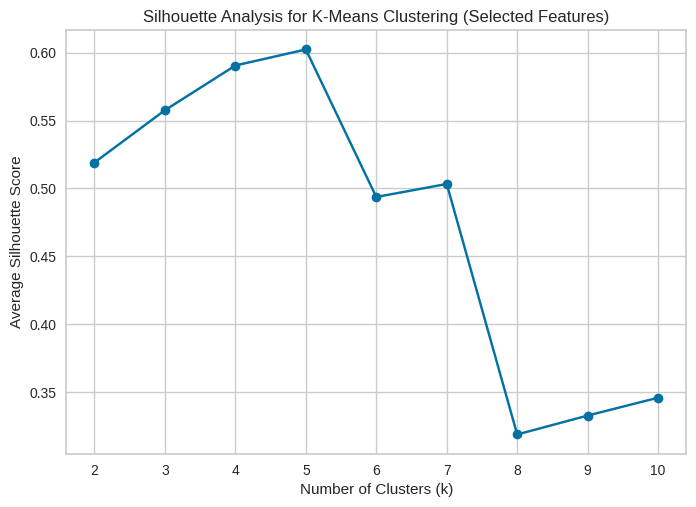

The highest average Silhouette score is 0.6023432193130702 with k=5.
The second highest average Silhouette score is 0.5905248976198446 with k=4.


In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
df = pd.read_csv('../Dataset/Processed_dataset.csv')

# Define the selected features
features = ['self_esteem', 'blood_pressure', 'sleep_quality', 'future_career_concerns', 'bullying']

# Scale the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])  # Scaling only the selected features

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []  # List to store silhouette scores for each k

# Perform K-means clustering and calculate the average Silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  # Fit the K-means model with the current k
    kmeans_result = kmeans.fit_predict(df_scaled)  # Predict the clusters
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)  # Calculate the average silhouette score
    silhouette_avg_values.append(silhouette_avg)  # Append the score to the list

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]  # k corresponding to the highest score
best_score = max(silhouette_avg_values)  # Highest silhouette score

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering (Selected Features)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Print the highest and second-highest average silhouette scores and their corresponding k values
print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")




As demonstrated above, the analysis revealed that the optimal number of clusters (k) maximizing the average Silhouette coefficient is 5

# Elbow method
The Elbow method is a commonly used technique in clustering analysis, particularly with k-means clustering, to identify the optimal number of clusters for a dataset. This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (k). The optimal number of clusters is typically indicated by the 'elbow' point on the curve, where the rate of decrease in WCSS slows significantly, suggesting a balance between cluster compactness and complexity.


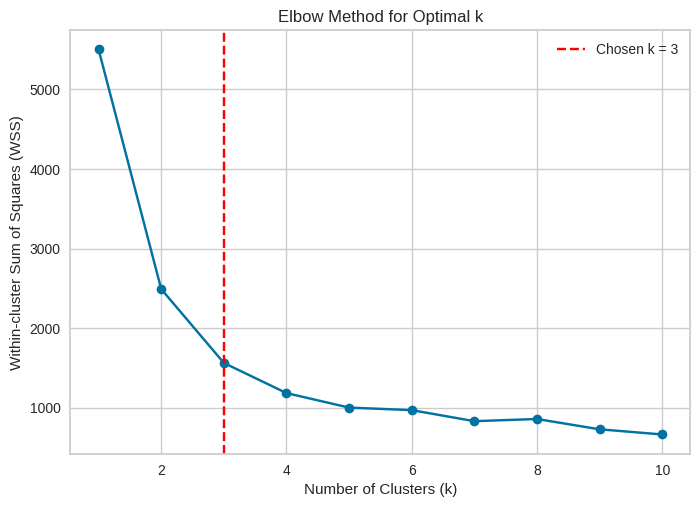

The optimal number of clusters (k) determined by the elbow method is 3.


In [136]:
# Install the kneed library for determining the optimal number of clusters using the elbow method
!pip install kneed

# Import necessary libraries for plotting and clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator


# Assuming df_scaled is the scaled data
X = df_scaled

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

# Fit K-means for each k value and calculate the WSS (Within-cluster Sum of Squares)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  # Initialize KMeans for each k
    kmeans.fit(X) # Fit the model to the data
    wss_values.append(kmeans.inertia_)  # Store the WSS for the current k

# Plot the elbow method: WSS vs number of clusters (k)
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to detect the 'elbow' or turning point in the curve
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow  # The point where the WSS starts to decrease at a slower rate

# Highlight the turning point (optimal k) in the plot
plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()  # Add a legend to the plot
plt.show()

# Print the optimal number of clusters (k) based on the elbow method
print(f"The optimal number of clusters (k) determined by the elbow method is {turning_point}.")


We discovered a second turning point that correlates to the second-highest average Silhouette coefficient after examining the elbow plot. We will select k=3 for the third k-means clustering since this turning point indicates a distinct cluster architecture. We hope to capture a wide variety of cluster forms and optimize the possible clustering performance by taking into account this extra turning point.

# k-Means Algorithm
Each cluster is characterized by its central point, known as the cluster centroid.

# K = 3

In [137]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the cluster centers (centroids) of the 3 clusters
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
# Print the labels for each data point, indicating which cluster each data point belongs to
print("\nCluster Labels:")
print(kmeans_result.labels_)


Cluster Centers:
[[ 0.87160896  0.03195539  1.07891605 -0.971755   -0.9775455 ]
 [-0.96549447  0.98198051 -0.8756586   0.96937318  0.90670043]
 [ 0.24972719 -1.41044155 -0.13665306 -0.12904182 -0.03430045]]

Cluster Labels:
[2 1 2 ... 0 1 1]


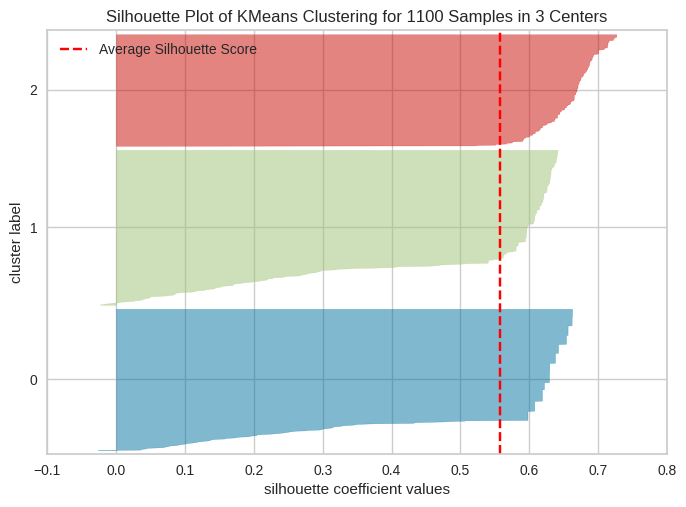

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [138]:

# Install necessary libraries for clustering visualizations
!pip install kneed yellowbrick
# Import necessary libraries
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=45)  # Random state for reproducibility
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick') # Initialize the SilhouetteVisualizer
# Fit the visualizer to the scaled data (df_scaled) and display the silhouette plot
visualizer.fit(df_scaled)
visualizer.show()



In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data (from your previous steps)
X = df_scaled

# Perform k-means clustering with k=3 (based on your analysis)
kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
kmeans.fit(X)
# Get the cluster labels for each data point after fitting the model
labels = kmeans.labels_

# Compute the Within-Cluster Sum of Squares (WSS), which measures how compact the clusters are.
# This is calculated as the sum of squared distances between data points and their respective centroids.
wss = kmeans.inertia_

# Compute the Average Silhouette Score, which assesses the quality of clustering
# Higher values (closer to 1) indicate well-separated clusters, while negative values suggest poor clustering.
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 1563.3293320237235
Average Silhouette Score: 0.5569280455512305


The average Silhouette Score is 0.5569, indicating that the clusters are reasonably separated but there may be some overlap between points in different clusters.

The WSS value is about 1563.33, indicating that the points within each cluster are moderately close.

# K = 4

In [140]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=45, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the cluster centers (centroids) of the 4 clusters
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
# Print the labels for each data point, indicating which cluster each data point belongs to
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 1.06884693 -0.15028213  1.16246324 -1.06848231 -1.05480507]
 [-1.07155845  0.98198051 -1.0432046   1.17510763  1.19072503]
 [ 0.2463754  -1.41841629 -0.13137956 -0.12369554 -0.03742675]
 [-0.39599774  0.98198051  0.0921584  -0.07170711 -0.30449488]]

Cluster Labels:
[2 1 2 ... 0 1 1]


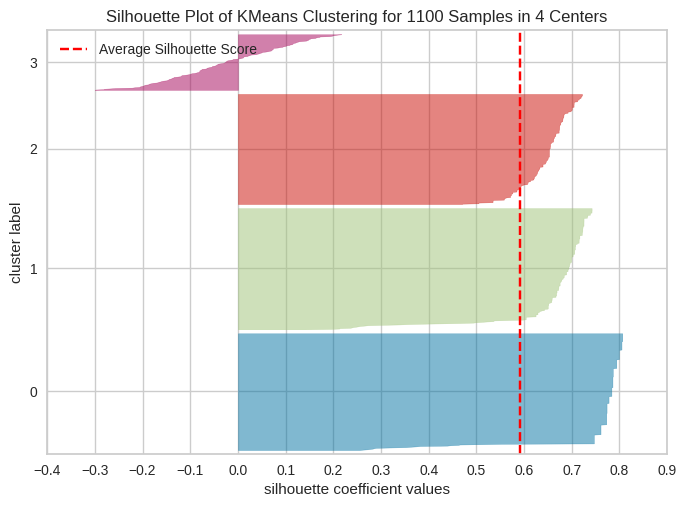

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1100 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [141]:

# Install the required packages for visualizing the silhouette scores and clustering
!pip install kneed yellowbrick
# Import necessary libraries
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=45)  # Random state for reproducibility
# Initialize the SilhouetteVisualizer to visualize the silhouette score of the clustering model
# 'colors' argument defines the color scheme for the visualization
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# Fit the visualizer on the scaled data (df_scaled)
visualizer.fit(df_scaled)
# Display the silhouette visualization
visualizer.show()

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=4 (based on your analysis)
# 'n_init' is set to 'auto', which ensures the best initialization for stable results.
kmeans = KMeans(n_clusters=4, random_state=45, n_init='auto')
kmeans.fit(X)
# Get the cluster labels for each data point after fitting the KMeans model.
labels = kmeans.labels_

# Compute the Within-Cluster Sum of Squares (WSS), which measures how compact the clusters are.
# Lower values indicate that the points are more tightly clustered around the centroids.
wss = kmeans.inertia_

# Compute the Average Silhouette Score, which evaluates both the cohesion (how similar points are within a cluster)
# and the separation (how distinct the clusters are from each other).
# Scores closer to 1 indicate well-separated clusters, while negative values suggest overlap.
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 1184.5678169269129
Average Silhouette Score: 0.591095806851136


The Silhouette Score value is 0.5911, which is higher than the previous value (0.5569), indicating that the clusters are better separated and more homogeneous in this analysis.

The WSS value is 1184.57, which is lower than the previous value (1563.33), which means that the clusters in this case are more homogeneous and cohesive compared to the previous analysis.
# K = 5

In [143]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

# Perform K-means clustering for K=5
kmeans = KMeans(n_clusters=5, random_state=45, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the cluster centers (centroids) of the 5 clusters
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
# Print the labels of the clusters assigned to each data point
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 1.06943686 -0.15744835  1.16434078 -1.06841722 -1.05479207]
 [-1.0876475   0.98198051 -1.07459326  1.19443506  1.19357164]
 [ 0.2463754  -1.41841629 -0.13137956 -0.12369554 -0.03742675]
 [-0.50442531  0.98198051  1.03861477  0.33604139 -0.091833  ]
 [-0.26188321  0.98198051 -0.94831853 -0.46654201 -0.37824321]]

Cluster Labels:
[2 1 2 ... 0 1 1]


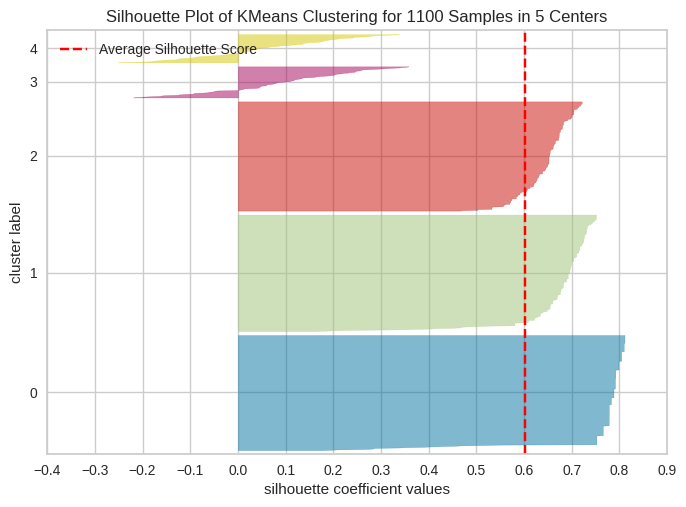

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1100 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [144]:

# Install the necessary packages (kneed and yellowbrick) if they are not already installed
!pip install kneed yellowbrick
# Import the SilhouetteVisualizer from yellowbrick and KMeans from scikit-learn
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Perform K-means clustering with K=5 clusters
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=45)  # Random state for reproducibility
# Create a SilhouetteVisualizer to evaluate the quality of the clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# Fit the visualizer to the scaled data (df_scaled) and display the silhouette plot
visualizer.fit(df_scaled)
visualizer.show()

In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data
X = df_scaled

# Initialize and fit the KMeans model with k=5 clusters.
# # 'n_init' specifies the number of times the algorithm will run with different centroid seeds.
# Setting 'n_init' to 'auto' ensures it selects a reliable initialization method.
kmeans = KMeans(n_clusters=5, random_state=45, n_init='auto')
kmeans.fit(X)
# Get the cluster labels for each data point.
# Each label indicates which cluster the corresponding data point belongs to.
labels = kmeans.labels_

# Calculate the Within-Cluster Sum of Squares (WSS).
 # WSS measures the total squared distance between each data point and its cluster's centroid.
# how compact the clusters are.
# Lower WSS indicates more compact clusters.
wss = kmeans.inertia_


# Calculate the Average Silhouette Score.
# This score measures how well each point is assigned to its cluster compared to other clusters.
# Values range from -1 to 1:
#   - Close to 1: Well-separated clusters.
#   - Close to 0: Overlapping clusters.
#   - Negative: Incorrect clustering.
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics: WSS and Average Silhouette Score.
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 1002.1736709966773
Average Silhouette Score: 0.6022920828329283


The Silhouette Score value is 0.6023, which is higher than the previous values ​​(0.5911 and 0.5569), indicating that the clusters are more well separated and the separation of points within clusters has become better.

The WSS value is 1002.17, which is lower than the previous values ​​(1563.33 and 1184.57), indicating that the clusters in this analysis are more homogeneous and that the points within the clusters are closer to the cluster centers.


#Evaluate the best models of Clustring:

 ##Average Silhouette Score:
Definition: Measures how well-defined clusters are by comparing the similarity of points within the same cluster to points in other clusters. Higher values indicate better-separated clusters.
Computed Values:
k=5: 0.6023 (the highest value, indicating the most well-defined clusters).
k=4: 0.5911 (slightly lower than k=5k = 5k=5, but still relatively high).
k=3: 0.5569 (the lowest, indicating less distinct clusters).

## Within-Cluster Sum of Squares (WSS):
Definition: Measures cluster compactness by calculating the sum of squared distances between each data point and its cluster centroid. Lower values indicate tighter clusters.
Computed Values:
k=5: 1002.17 (the lowest value, indicating the most compact clusters).
k=4: 1184.57 (higher than k=5k = 5k=5, indicating less compact clusters).
k=3: 1563.33 (the highest value, indicating the least compact clusters).

##Conclusion:
Based on the metrics:
Average Silhouette Score: k=5k = 5k=5 achieves the highest score (0.60230.60230.6023), indicating the best cluster separation.
WSS: k=5k = 5k=5 has the lowest value (1002.171002.171002.17), showing the most compact clusters.
Selection: k=5k = 5k=5 is chosen as the optimal number of clusters because it balances well-defined clusters (high silhouette score) with compact grouping (low WSS), making it the best configuration for this dataset.
